In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [3]:
dataset = pd.read_csv("C:\\temp\\Data Science\\Kaggle\\Weather\\Summary of Weather.csv")

In [4]:
dataset.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [6]:
dataset.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

In [7]:
dataset.shape

(119040, 31)

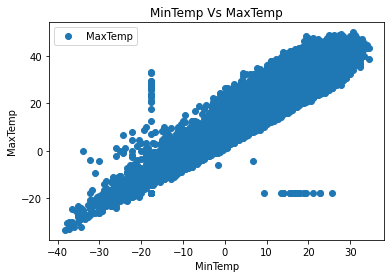

In [8]:
# Plot MinTemp vs MaxTemp

dataset.plot(x = 'MinTemp', y = 'MaxTemp', style = 'o')
plt.title('MinTemp Vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

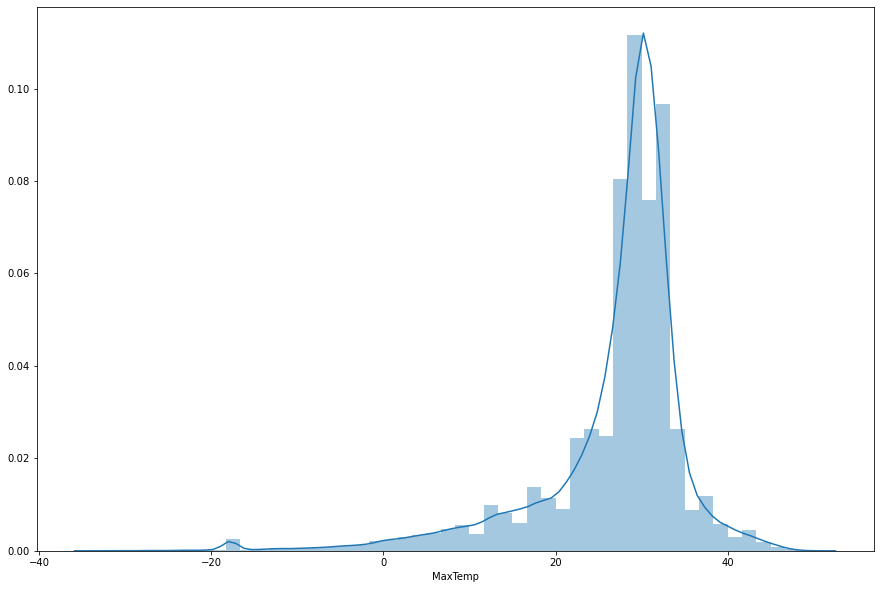

In [9]:
plt.figure(figsize= (15, 10))
plt.tight_layout()
sns.distplot(dataset['MaxTemp'])

In [10]:
X = dataset['MinTemp'].values.reshape(-1,1)
Y = dataset['MaxTemp'].values.reshape(-1,1)

In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [12]:
# Verify train/test split - Total size of data
dataset.shape

(119040, 31)

In [14]:
# Verify train/test split - Size of X Training data
Xtrain.shape

(95232, 1)

In [15]:
# Verify train/test split - Size of Y Training data
Ytrain.shape

(95232, 1)

In [16]:
# Verify train/test split - Size of X Testing data
Xtest.shape

(23808, 1)

In [17]:
# Verify train/test split - Size of Y Testing data
Ytest.shape

(23808, 1)

In [18]:
# Train/Fit Data

regressor = LinearRegression()
regressor.fit(Xtrain, Ytrain)

LinearRegression()

In [19]:
# After training, find intercept

print(regressor.intercept_)

[10.66185201]


In [21]:
# After Training, find slope

print(regressor.coef_)

[[0.92033997]]


In [22]:
# Predict

y_predict = regressor.predict(Xtest)

In [23]:
# Compare actual and predicted data

df = pd.DataFrame({'Actual': Ytest.flatten(), 'Predicted': y_predict.flatten()})
df

,Actual,Predicted
0,28.888889,33.670351
1,31.111111,30.091251
2,27.222222,26.512151
3,28.888889,31.113851
4,23.333333,15.774852
...,...,...
23803,32.777778,32.136451
23804,32.222222,29.068651
23805,31.111111,32.647751
23806,31.111111,30.602551


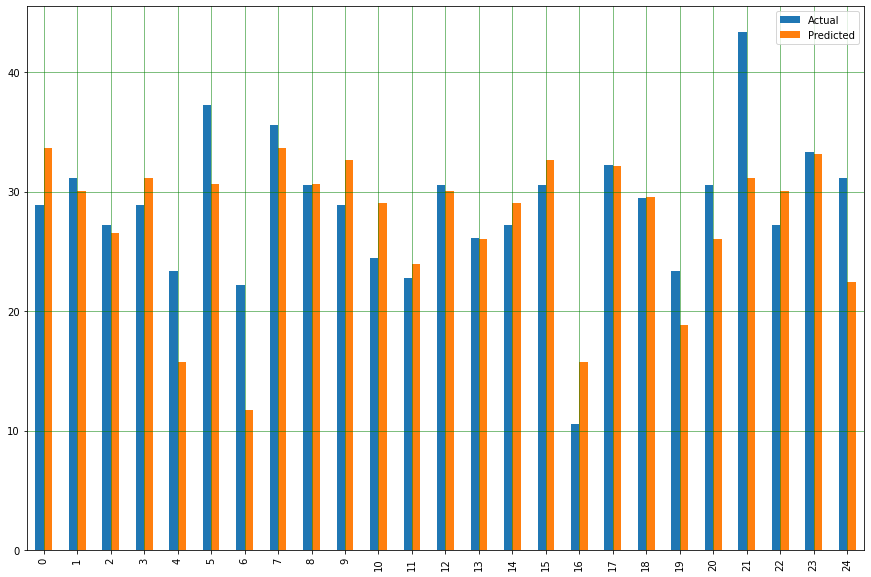

In [32]:
# Visualize comparison between actual and predicted
# Only taking 25 records

df1 = df.head(25)
df1.plot(kind = 'bar', figsize = (15, 10))
plt.grid(which = 'major', linestyle = '-', color = 'green', linewidth = '0.5')
plt.show()

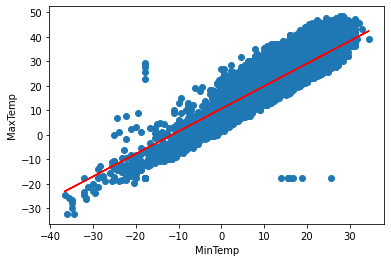

In [38]:
plt.scatter(Xtest, Ytest)
plt.plot(Xtest, y_predict, color = 'red')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [40]:
# Evaluate model using Mean Absolute Error
print('Mean Aboslute Error:', metrics.mean_absolute_error(Ytest, y_predict))

Mean Aboslute Error: 3.1993291783785835


In [41]:
# Evaluate model using Mean Squared Error
print('Mean Squared Error:', metrics.mean_squared_error(Ytest, y_predict))

Mean Squared Error: 17.631568097568532


In [44]:
# Evaluate model using Root mean squared error
print('Root mean squared Error', np.sqrt(metrics.mean_squared_error(Ytest, y_predict)))

Root mean squared Error 4.198996082109215


In [53]:
# Mean temperature to compare value of root mean squared error.
# If RMSE is less than 10% of mean temerature, it means model is good
np.mean(dataset['MeanTemp'])

22.41163101152127